In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/abalone.csv',names=['sex','length','diameter','height','whole_weight','shucked_weight',
                                                 'viscera_weight','shell_weight','rings'])

In [3]:
data.shape

(4177, 9)

In [4]:
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [7]:
label_enc = LabelEncoder()
oe_enc = OneHotEncoder()

In [8]:
data['sex'] = label_enc.fit_transform(data['sex'])

In [9]:
data['sex'].head()

0    2
1    2
2    0
3    2
4    1
Name: sex, dtype: int64

In [10]:
z = pd.get_dummies(data['sex'],columns=['female','infant','male'])

In [11]:
data['female'] = z.values[:,0]
data['infant'] = z.values[:,1]
data['male'] = z.values[:,2]

In [12]:
data = data.drop(['sex'],axis=1)

In [13]:
data_x = data[['length','diameter','height','whole_weight','shucked_weight',
                                                 'viscera_weight','shell_weight',
                                                  'female','infant','male']]

data_y = data['rings']

In [14]:
print('Training data :',data_x.head())
print('Training labels :',data_y.head())

Training data :    length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  female  infant  male  
0         0.150       0       0     1  
1         0.070       0       0     1  
2         0.210       1       0     0  
3         0.155       0       0     1  
4         0.055       0       1     0  
Training labels : 0    15
1     7
2     9
3    10
4     7
Name: rings, dtype: int64


In [15]:
print('Training data shape :',data_x.shape)
print('Training labels shape :',data_y.shape)

Training data shape : (4177, 10)
Training labels shape : (4177,)


In [16]:
print('Min age : ',data_y.min())
print('Max age : ',data_y.max())
print('Meadian of age : ',data_y.median())
print('Mean age : ',data_y.mean())

Min age :  1
Max age :  29
Meadian of age :  9.0
Mean age :  9.933684462532918


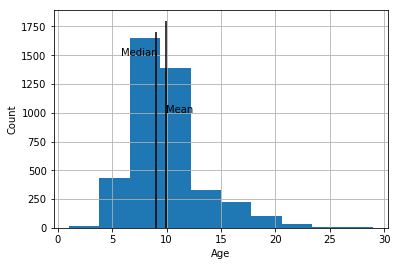

In [17]:
data_y.hist()
plt.xlabel('Age')
plt.ylabel('Count')

plt.vlines(data_y.mean(),ymin=0,ymax=1800)
plt.annotate('Mean',(9.9,1000))

plt.vlines(data_y.median(),ymin=0,ymax=1700)
plt.annotate('Median',(5.8,1500))

plt.show()

In [18]:
data.corr()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,female,infant,male
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.298421,-0.518552,0.215459
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
female,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
infant,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


Text(0,0.5,'Length')

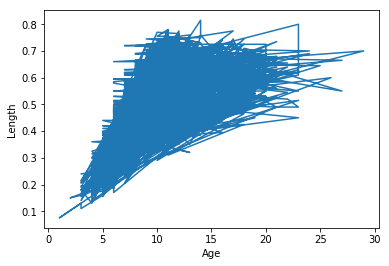

In [19]:
plt.plot(data_y,data['length'])
plt.xlabel('Age')
plt.ylabel('Length')

Text(0,0.5,'diameter')

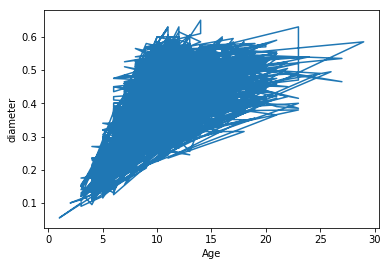

In [20]:
plt.plot(data_y,data['diameter'])
plt.xlabel('Age')
plt.ylabel('diameter')

Text(0,0.5,'Length')

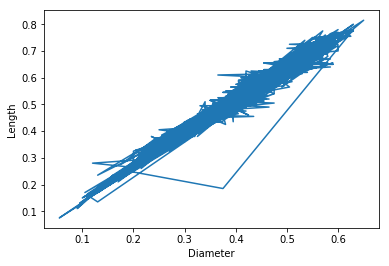

In [21]:
plt.plot(data['diameter'],data['length'])
plt.xlabel('Diameter')
plt.ylabel('Length')

Text(0,0.5,'Shell Weight')

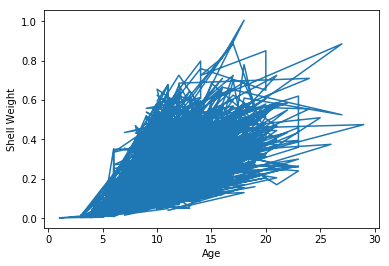

In [22]:
plt.plot(data_y,data['shell_weight'])
plt.xlabel('Age')
plt.ylabel('Shell Weight')

Text(0.5,0,'Shell Weight')

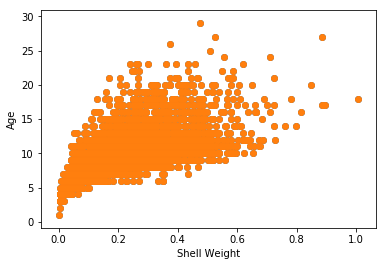

In [23]:
plt.scatter(data['shell_weight'],data_y)
plt.ylabel('Age')
plt.xlabel('Shell Weight')
plt.scatter(data['shell_weight'],data_y)
plt.ylabel('Age')
plt.xlabel('Shell Weight')

Text(0,0.5,'Length')

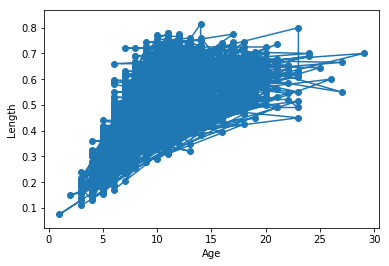

In [24]:
plt.scatter(data_y,data['length'])
plt.xlabel('Age')
plt.ylabel('Length')

plt.plot(data_y,data['length'])
plt.xlabel('Age')
plt.ylabel('Length')

In [25]:
data_y.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [26]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

In [27]:
poly = PolynomialFeatures(degree=3)
lr = LinearRegression(normalize=True)
logist_r = LogisticRegression()
svr = SVR()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.2,random_state=42)

In [30]:
print('Train data size : ',x_train.shape)
print('Train label size : ',y_train.shape)
print('Test data size : ',x_test.shape)
print('Test label size : ',y_test.shape)

Train data size :  (3341, 10)
Train label size :  (3341,)
Test data size :  (836, 10)
Test label size :  (836,)


In [31]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [32]:
pre = lr.predict(x_test)

In [33]:
lr.score(x_train,y_train)

0.5348243545188456

In [34]:
lr.score(x_test,y_test)

0.5481628137889262

In [35]:
logist_r.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
logist_r.score(x_train,y_train)

0.2514217300209518

In [37]:
svr.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
svr.score(x_train,y_train)

0.4255460850772578

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf = RandomForestRegressor(n_estimators=100)

In [41]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
rf.score(x_test,y_test)

0.5401239437059062

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
pred_lr = lr.predict(x_test)
pred_rf = rf.predict(x_test)
pred_svr = svr.predict(x_test)

In [45]:
pred_rf_1 = np.round(pred_rf)
pred_lr_1 = np.round(pred_lr)
pred_svr_1 = np.round(pred_svr)

In [46]:
pred_rf_1[:10]

array([12.,  9., 15., 11., 12., 11.,  9.,  9.,  6., 11.])

In [47]:
pred_lr_1[:10]

array([12., 10., 14., 12., 11., 10.,  9.,  9.,  7., 11.])

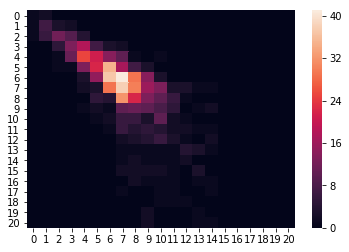

In [48]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred_rf_1))

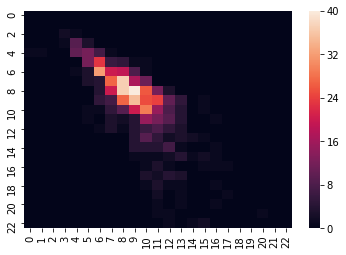

In [49]:
sns.heatmap(confusion_matrix(y_test,pred_lr_1))

In [50]:
from sklearn.model_selection import StratifiedKFold

In [51]:
sf = StratifiedKFold(n_splits=3)

In [52]:
def train_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    return score

In [53]:
random_forest = []
linear_regression = []
svr_l = []
poly_l = []
data_y.index

RangeIndex(start=0, stop=4177, step=1)

In [54]:
sf.get_n_splits(data_x,data_y)

3

In [55]:
poly.fit_transform(data_x)
lr.fit(data_x,data_y)
lr.score(x_test,y_test)

0.5494120973116581

In [56]:
poly.fit_transform(x_test)
pred_poly = lr.predict(x_test)

In [57]:
for train_index, test_index in sf.split(data_x,data_y):
    x_train,y_train,x_test,y_test = data_x.iloc[train_index],data_y.iloc[train_index],data_x.iloc[test_index],data_y.iloc[test_index]    
    linear_regression.append(train_model(lr,x_train,x_test,y_train,y_test))
    random_forest.append(train_model(rf,x_train,x_test,y_train,y_test))
    svr_l.append(train_model(svr,x_train,x_test,y_train,y_test))
    poly.fit_transform(x_train)
    poly.fit_transform(x_test)
    poly_l.append(train_model(lr,x_train,x_test,y_train,y_test))
    
print('Score for Random Forest : ',random_forest)
print('Score for Linear Regression : ',linear_regression)
print('Score for Polynomial Feature : ',poly_l)
print('Score for SVR : ',svr_l)

C:\Users\Bipin Krishnan P\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Score for Random Forest :  [0.5143070406969364, 0.5439097902194646, 0.5097311172954789]
Score for Linear Regression :  [0.564426981522428, 0.5000208509650419, 0.5158993876783107]
Score for Polynomial Feature :  [0.564426981522428, 0.5000208509650419, 0.5158993876783107]
Score for SVR :  [0.3900392207899398, 0.4127625843743381, 0.43098746026235113]


In [58]:
for train_index, test_index in sf.split(data_x,data_y):
    x_train,y_train,x_test,y_test = data_x.iloc[train_index],data_y.iloc[train_index],data_x.iloc[test_index],data_y.iloc[test_index]    
    linear_regression.append(train_model(lr,x_train,x_test,y_train,y_test))
    poly.fit_transform(x_train)
    poly.fit_transform(x_test)
    poly_l.append(train_model(lr,x_train,x_test,y_train,y_test))
    
print('Score for Linear Regression : ',linear_regression)
print('Score for Polynomial Feature : ',poly_l)


C:\Users\Bipin Krishnan P\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Score for Linear Regression :  [0.564426981522428, 0.5000208509650419, 0.5158993876783107, 0.564426981522428, 0.5000208509650419, 0.5158993876783107]
Score for Polynomial Feature :  [0.564426981522428, 0.5000208509650419, 0.5158993876783107, 0.564426981522428, 0.5000208509650419, 0.5158993876783107]


In [73]:
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(data_x,data_y,test_size=0.2)

In [74]:
lr.fit(x_train_1,y_train_1)
lr.score(x_test_1,y_test_1)

0.5343816477705317

In [76]:
poly.fit_transform(x_train_1)
lr.fit(x_train_1,y_train_1)
lr.score(x_test_1,y_test_1)

0.5343816477705317

In [70]:
x_train_1.shape

(3341, 10)

In [71]:
y_train_1.shape

(3341,)